#### EDA includes these basic checks and handling on the dataset to remove noises. 
    - Data summary
    - Target analysis
    - Univariate analysis
        - Histogram
        - Missing values handling
        - Normality check
        - Encoding
        - Outliers handling
        - Dimensionality reduction
    - Bivariate analysis
        - Correlation check/multi-collinearity check
        - Pair-plot
        - Scatter plot
        - Outliers handling
##### In this NB; we will be peforming EDA on titanic dataset. For more details on the dataset and problem refer to https://www.kaggle.com/c/titanic/data .

In [4]:
#### import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew


In [8]:
df = pd.read_csv('train.csv')  ## import dataset 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
# check shape of the dataset
df.shape

# dataset has 891 rows/records and 12 columns

(891, 9)

In [10]:
# list out columns name
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
### Always try to identify and list out key factors associated with the problem in hand. The factors below can be few crucial factors for the titanic problem.
# age
# PClass
# Sex
# Parch
# flag_disability 
# flag_help 
# flag_employee/visitor
# profession
# flag_rescueboats
# flag_SibSp 
# Cabin
# temperature 
# 

In [21]:
# 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
### target analysis
df.Survived.unique()

array([0, 1])

In [19]:
# proportion of survival and died cases
print(round(df[df.Survived== 0].shape[0]*100/df.shape[0],2))
print(round(df[df.Survived== 1].shape[0]*100/df.shape[0],2))

61.62
38.38


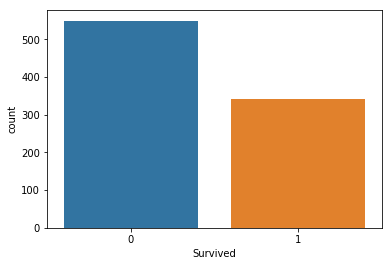

In [20]:
# proportion of survival and died cases
sns.countplot(df.Survived)

In [23]:
## percentage of MIssing values
round(df.isnull().sum()/len(df)*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

### Handling missing values
            # if missing values > = 70%; drop the columns
            # if missing values < 70 % ; handle 
            #     zero, mean, median, mode, random numbers within 2 standard deviation

            ### Based on the rule book; we are going to 
            # drop 'Cabin'
            # fill Age/Embarked with average/high frequency level


In [55]:
### Encoding - is important for mapping objects to corresponding number format.

# selecting numerical and categorical columns
num_features = df.select_dtypes(include=np.number).columns
cat_features = df.select_dtypes(include=np.object).columns

In [25]:
print(num_features)
print(cat_features)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [27]:
# select only categorical features from dataframe 'df'
df[cat_features].head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


### Handling categorical features in above dataframe
        - drop 'Name' because 'Name' is nominal data 
        - Sex - mapping ; replace male with 0 and female with 1 or vice-versa
        - drop 'Ticket' ; because it is nomincal data
        - drop Cabin; because it has greater than 70 % missing values
        - Embarked - mapping; perform one-hot-encoding


In [28]:
# encoding 'Sex'
df['Sex'] = df.Sex.map({'male':0,'female':1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [30]:
print(df['Embarked'].unique())
df['Embarked'].fillna(value = 'S',inplace = True)

# for embarked OHE required

['S' 'C' 'Q' nan]


In [42]:
df['Age'].fillna(value = np.mean(df['Age']),inplace=True)

In [31]:
print(df['Embarked'].unique())

['S' 'C' 'Q']


In [32]:
# dropping name, cabin, ticket
df.drop(['Name','Cabin','Ticket'], axis = 1, inplace=True)

In [33]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13a3dfad0>,
      dtype=object)

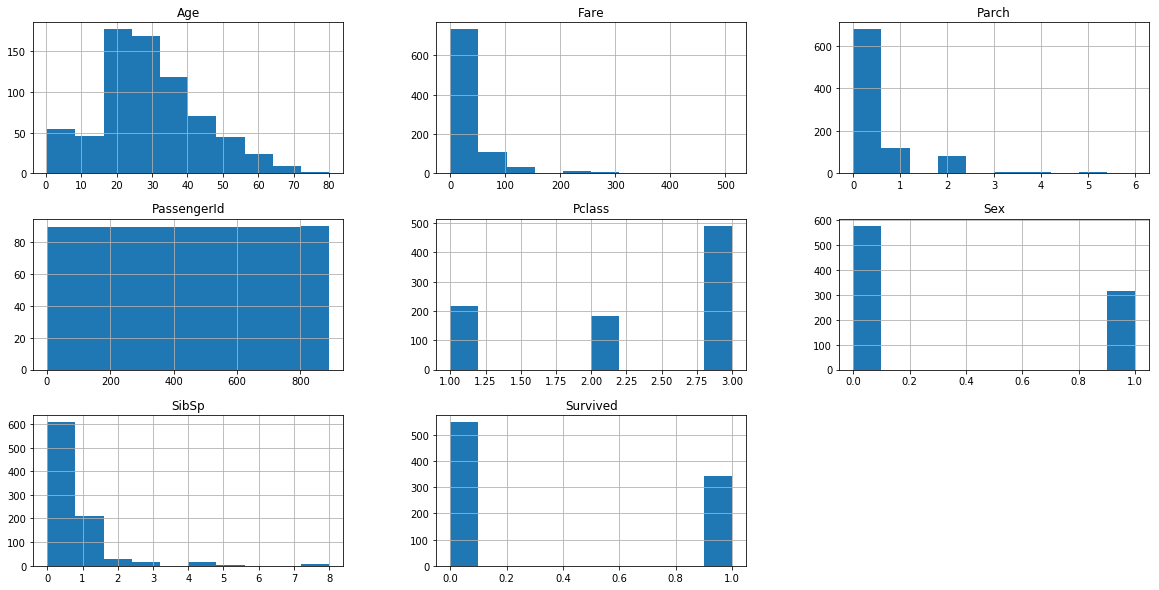

In [35]:
### histogram plot can give insights about data type and normal distribution
df.hist(figsize=(20,10))

Text(0.5, 1.0, 'Fare Distribution')

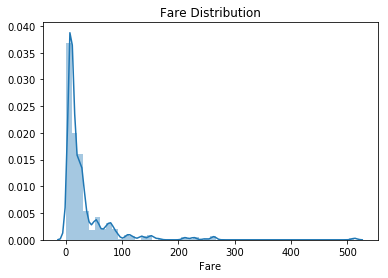

In [56]:
### displot gives graphical representation of the data distribution 
sns.distplot(df.Fare)
plt.xlabel('Fare')
plt.title('Fare Distribution')

Text(0.5, 1.0, 'Transformed Fare Distribution - log transformed')

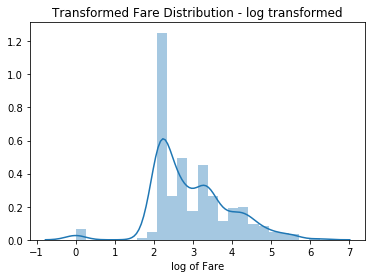

In [57]:
sns.distplot(np.log1p(df.Fare))
plt.xlabel('log of Fare')
plt.title('Transformed Fare Distribution - log transformed')

#### insights on 'Fare' column
         -- 'Fare' column has positive skewness
         -- log transformed distribution resembles more bell-curved than raw 'Fare' data

In [38]:
print(np.std(df.Fare))
print(np.std(np.log1p(df.Fare)))

49.66553444477411
0.9685043193244568


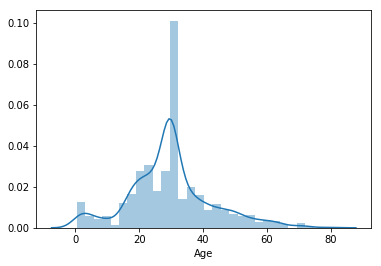

In [43]:
sns.distplot(df.Age)

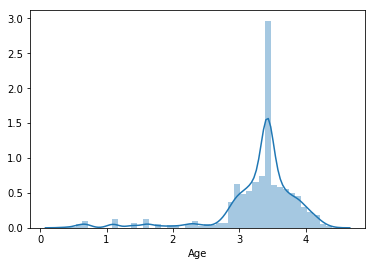

In [46]:
sns.distplot(np.log1p(df.Age))

In [48]:
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C


In [50]:
### get_dummies can be used for OHE (one-hot-encoding)
df2 = pd.get_dummies(df)
df2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,1


Text(0.5, 1.0, 'Scatter plot')

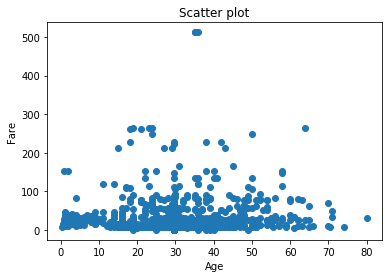

In [58]:
### scatter plot gives information on data about: direction; proximity between points/spread of points; outliers if any

plt.scatter(df['Age'],df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter plot')

In [ ]:
# ### use similar approach for dropping outliers if any
# df[df.Fare > 400].index.drop()

#### Correlation check - helps to identify correlated features. 
        - If two features are highly/strongly correlated, one feature must be dropped off.


In [59]:
df.corr()  ### .corr() returns pearson correlation coefficient  # [-1,1]
# if strongly correated, remove one features

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000
